In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def finite_fft(f, a, N, M=None):
    """
    Реализация финитного преобразования Фурье с использованием БПФ.
    f: функция, заданная как массив
    a: предел интегрирования [-a, a]
    N: число точек дискретизации
    M: число точек после дополнения нулями (должно быть степенью двойки)
    """
    if M is None:
        M = 2**int(np.ceil(np.log2(N)))

    # Шаг дискретизации
    hx = (2 * a) / N

    # Дополнение массива нулями до размера M
    f_padded = np.pad(f, (M - N) // 2, 'constant')

    # Перестановка половин массива
    f_shifted = np.fft.fftshift(f_padded)

    # Применение БПФ
    F = np.fft.fft(f_shifted)

    # Корректировка результата
    F = F * hx
    F = np.fft.fftshift(F)

    # Вычисление шага по u и диапазона значений
    hu = 1 / (M * hx)
    b = M / (4 * a)
    u = np.linspace(-b, b, M)

    return u, F

In [3]:
# Определяем функцию гауссова пучка
def gaussian_pulse(x):
    return np.exp(-x**2)

In [4]:
a = 5
N = 2 ** 12
M = 2 ** 18
b = M / (4 * a)

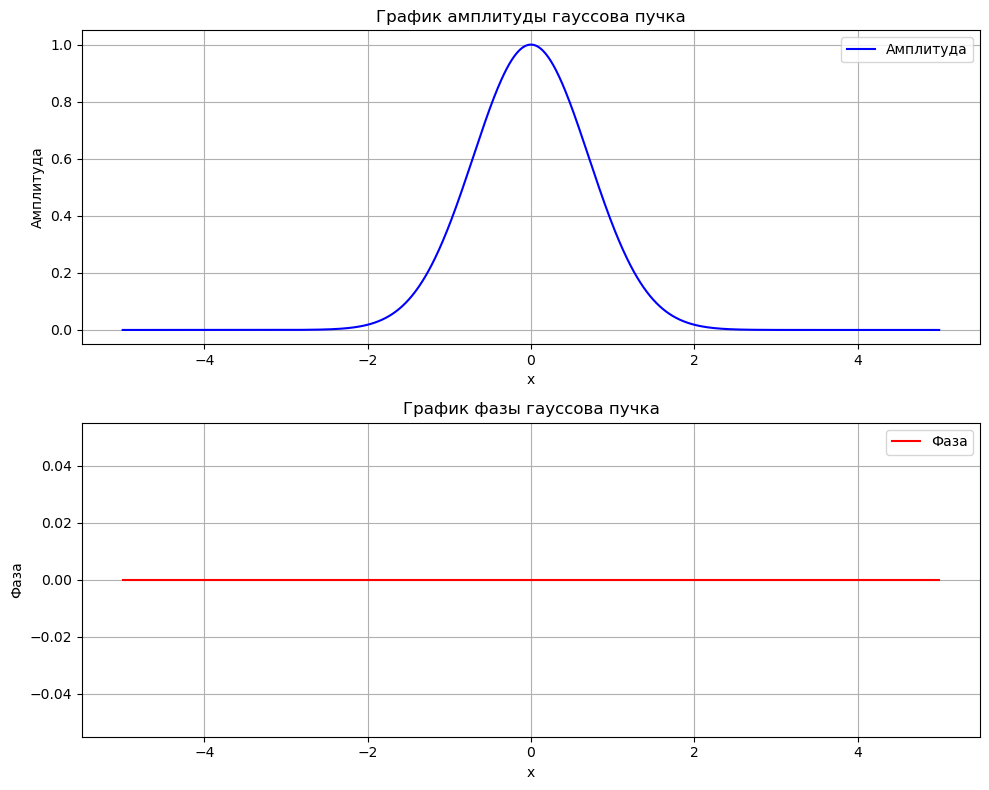

In [5]:
# Генерация оси x
x = np.linspace(-5, 5, 1000)

# Генерация значений гауссова пучка
y = gaussian_pulse(x)

# Амплитуда: это просто абсолютное значение функции (для вещественной функции это саму функцию)
amplitude = np.abs(y)

# Фаза: так как функция вещественная, фаза всегда 0
phase = np.angle(y)  # В данном случае будет всегда 0

# Создание графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# График амплитуды
ax[0].plot(x, amplitude, label='Амплитуда', color='b')
ax[0].set_title('График амплитуды гауссова пучка')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Амплитуда')
ax[0].grid(True)
ax[0].legend()

# График фазы
ax[1].plot(x, phase, label='Фаза', color='r')
ax[1].set_title('График фазы гауссова пучка')
ax[1].set_xlabel('x')
ax[1].set_ylabel('Фаза')
ax[1].grid(True)
ax[1].legend()

# Отображаем графики
plt.tight_layout()
plt.show()

Преобразование Фурье на дискретных данных:
$f
^
​
 (k)= 
∑_
{n=0}^
{N−1}
​
 f(x_ 
n
​
 )⋅e^ 
{−2πikx_n/N} 
​$

Обратное преобразование Фурье: $f(x)= 
∑_
{k=0}^
{N−1}
​
  
f
^
​
 (k)⋅e^ 
{2πikx/N}$

In [6]:
a = 5
N = 2 ** 8

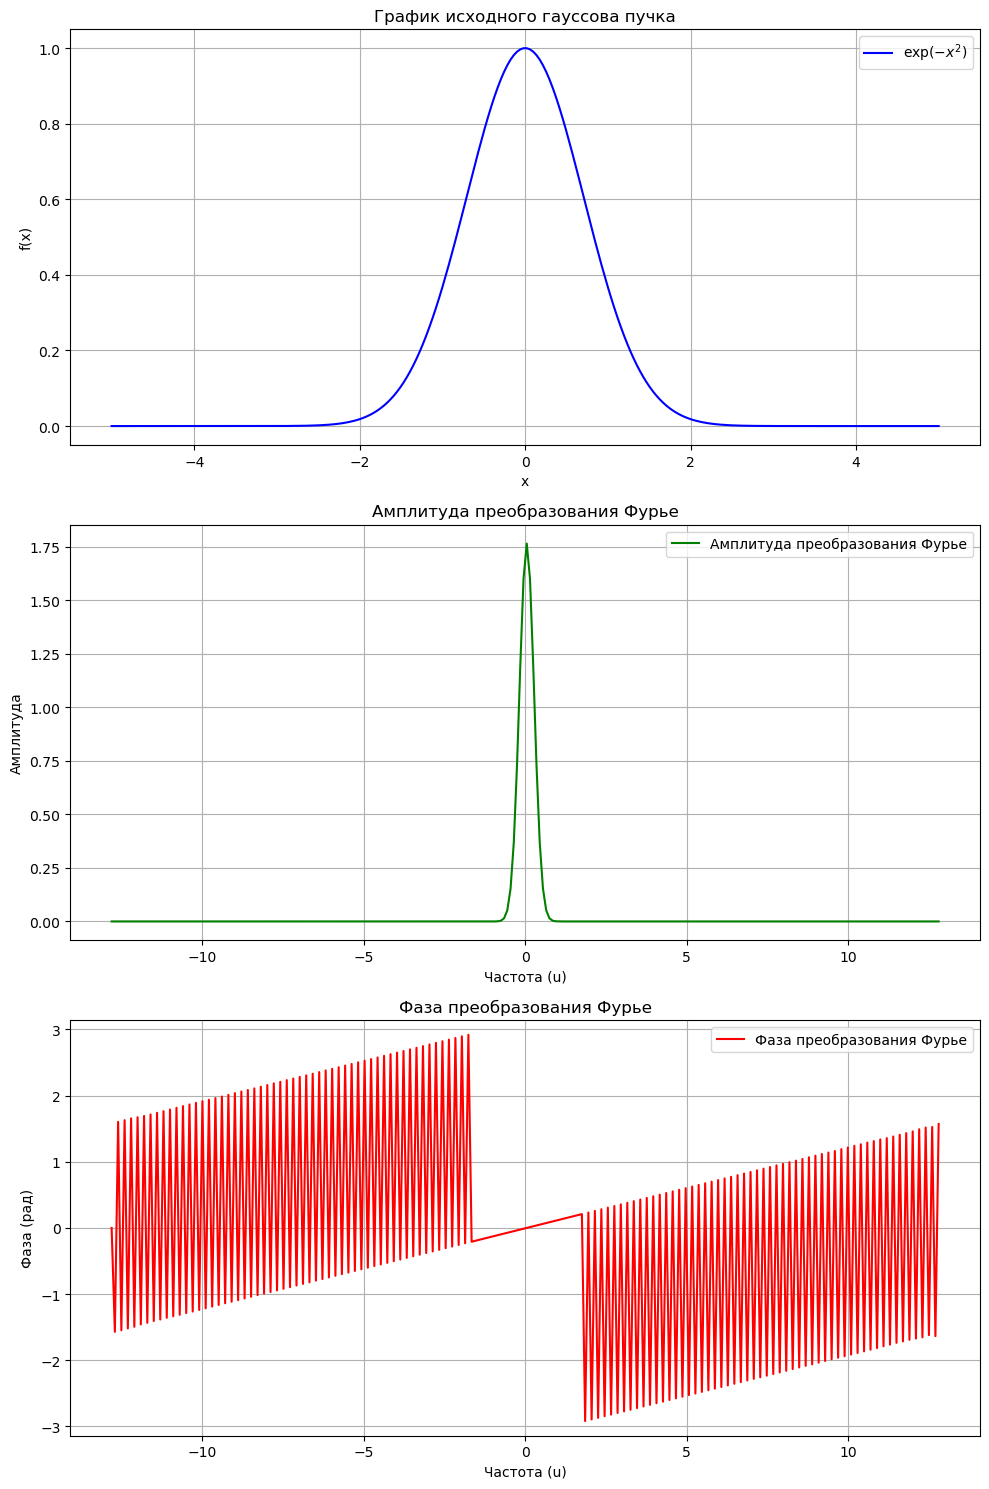

In [7]:
x = np.linspace(-a, a, N)  # Массив x
f = np.exp(-x**2)  # Гауссов пучок

# 2. Применение финитного преобразования Фурье
u, F = finite_fft(f, a, N)

# 3. Построение графиков амплитуды и фазы
amplitude = np.abs(F)
phase = np.angle(F)

# Графики
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# 3.1 График исходного гауссова пучка
ax[0].plot(x, f, label=r"$\exp(-x^2)$", color='blue')
ax[0].set_title("График исходного гауссова пучка")
ax[0].set_xlabel("x")
ax[0].set_ylabel("f(x)")
ax[0].grid(True)
ax[0].legend()

# 3.2 График амплитуды
ax[1].plot(u, amplitude, label="Амплитуда преобразования Фурье", color='green')
ax[1].set_title("Амплитуда преобразования Фурье")
ax[1].set_xlabel("Частота (u)")
ax[1].set_ylabel("Амплитуда")
ax[1].grid(True)
ax[1].legend()

# 3.3 График фазы
ax[2].plot(u, phase, label="Фаза преобразования Фурье", color='red')
ax[2].set_title("Фаза преобразования Фурье")
ax[2].set_xlabel("Частота (u)")
ax[2].set_ylabel("Фаза (рад)")
ax[2].set_ylim([-np.pi, np.pi])  # Ограничиваем фазу от -π до π
ax[2].grid(True)
ax[2].legend()

plt.tight_layout()
plt.show()

In [8]:
def numerical_integration_fft(f, a, N):
    """
    Реализация ФПФ методом численного интегрирования.
    """
    hx = (2 * a) / N
    x = np.linspace(-a, a, N)
    b = 1 / (2 * hx)
    u = np.linspace(-b, b, N)
    F = np.zeros_like(u, dtype=complex)

    for i, ui in enumerate(u):
        F[i] = np.sum(f * np.exp(-2j * np.pi * ui * x)) * hx

    return u, F

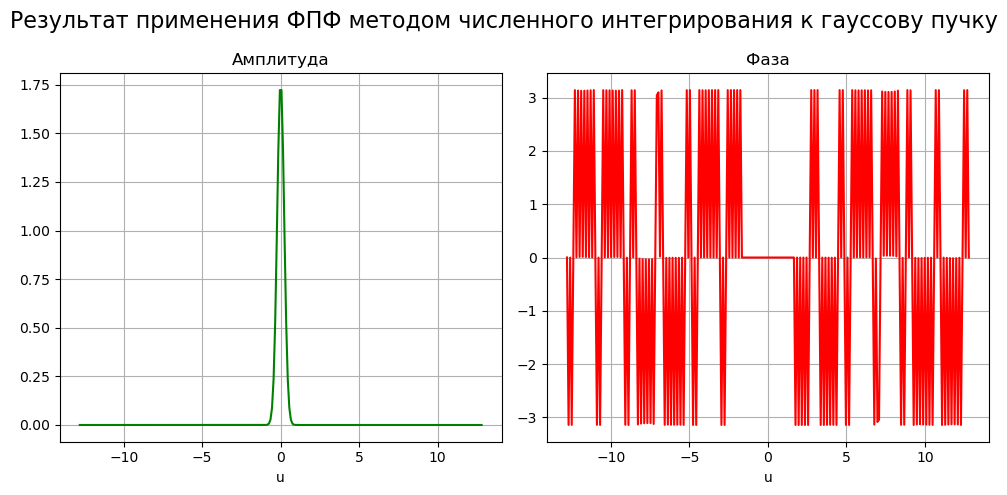

In [9]:
u_num, F_num = numerical_integration_fft(f, a, N)

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Результат применения ФПФ методом численного интегрирования к гауссову пучку', fontsize=16)
plt.subplot(1, 2, 1)
plt.plot(u_num, np.abs(F_num), label="Численный интеграл", color='green')
plt.title("Амплитуда")
plt.xlabel("u")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(u_num, np.angle(F_num), label="Численный интеграл", color='red')
plt.title("Фаза")
plt.xlabel("u")
plt.grid()

plt.tight_layout()
plt.show()

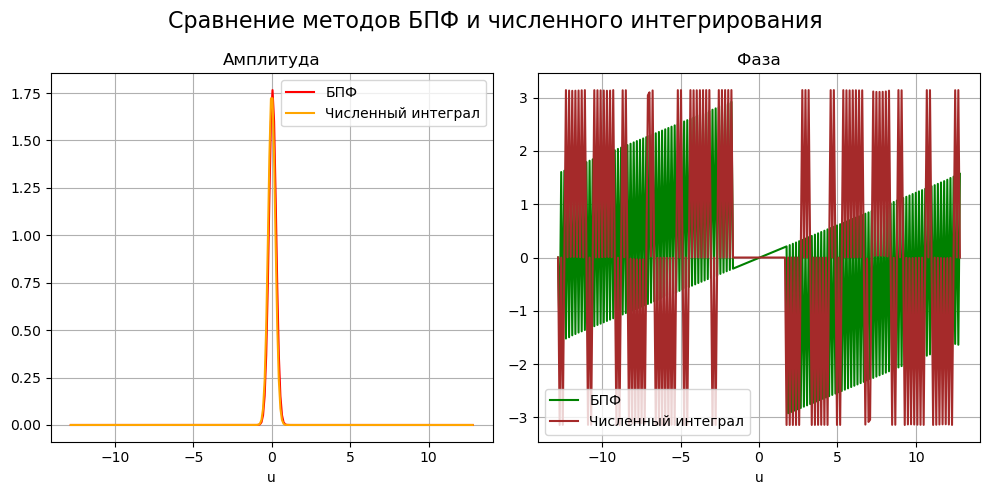

In [10]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Сравнение методов БПФ и численного интегрирования', fontsize=16)

plt.subplot(1, 2, 1)
plt.plot(u, np.abs(F), label="БПФ", color='red')
plt.plot(u_num, np.abs(F_num), label="Численный интеграл", color='orange')
plt.title("Амплитуда")
plt.xlabel("u")
# plt.ylabel("Амплитуда")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(u, np.angle(F), label="БПФ", color='green')
plt.plot(u_num, np.angle(F_num), label="Численный интеграл", color="brown")
plt.title("Фаза")
plt.xlabel("u")
# plt.ylabel("Фаза")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [11]:
# Определение функции f(x) = x^2 * exp(-x^2)
def f_field(x):
    return x**2 * np.exp(-x**2)

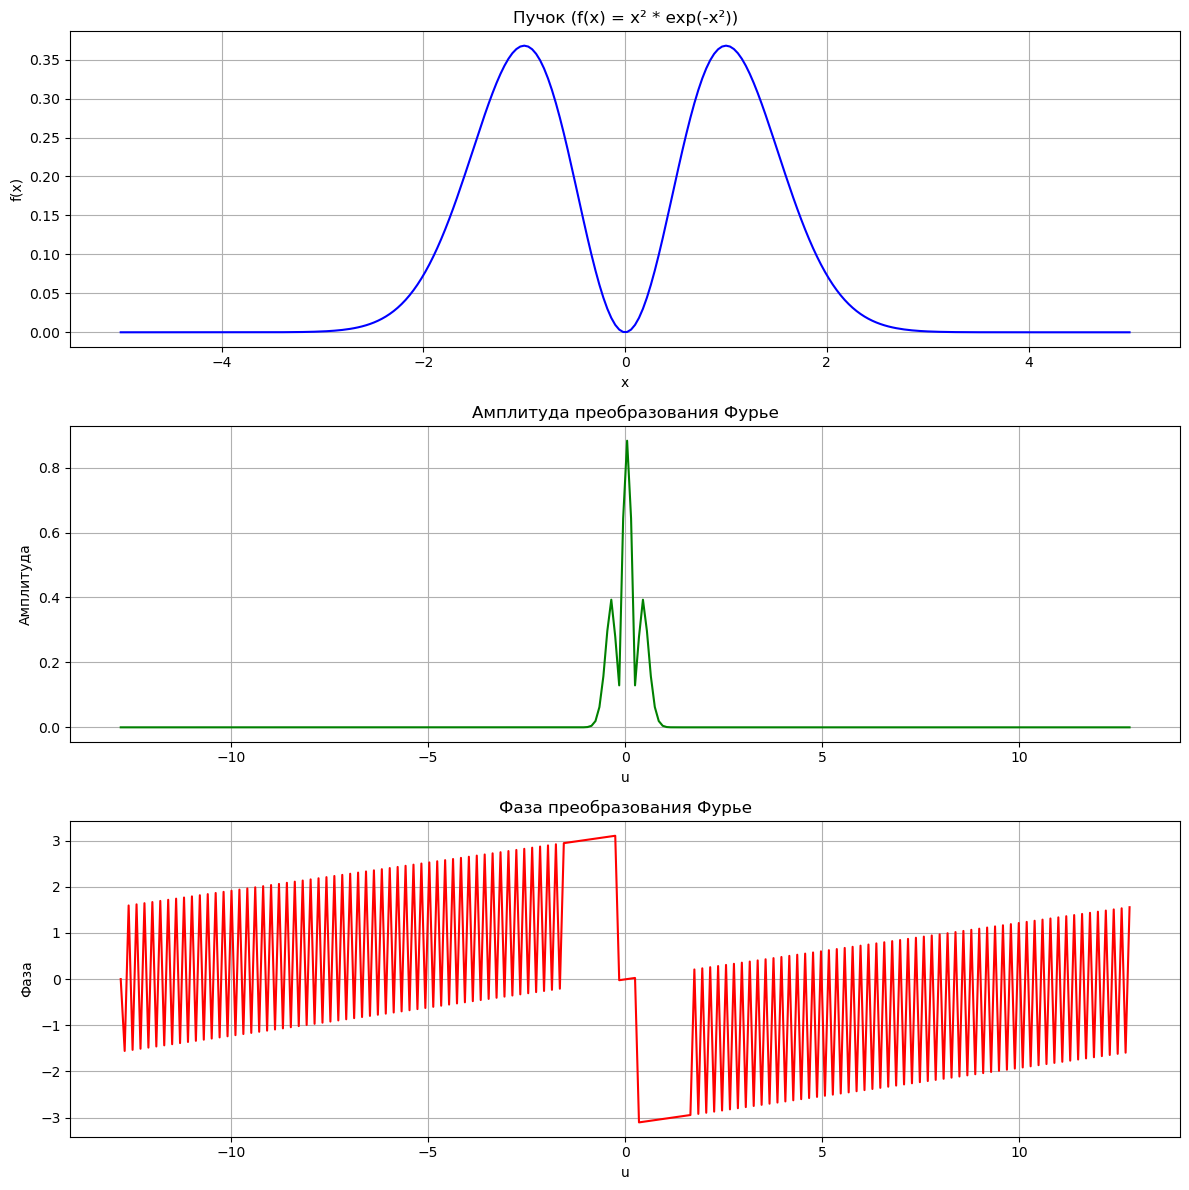

In [12]:
# Создаем массив точек x
x = np.linspace(-a, a, N)

# Вычисляем функцию f(x)
f = f_field(x)

# Применяем БПФ
u, F = finite_fft(f, a, N)

# Амплитуда и фаза
amplitude = np.abs(F)
phase = np.angle(F)

# Построение графиков на отдельных подграфиках
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# График самого пучка
axs[0].plot(x, f, color='blue')
axs[0].set_title("Пучок (f(x) = x² * exp(-x²))")
axs[0].set_xlabel("x")
axs[0].set_ylabel("f(x)")
axs[0].grid(True)

# График амплитуды
axs[1].plot(u, amplitude, color='green')
axs[1].set_title("Амплитуда преобразования Фурье")
axs[1].set_xlabel("u")
axs[1].set_ylabel("Амплитуда")
axs[1].grid(True)

# График фазы
axs[2].plot(u, phase, color='red')
axs[2].set_title("Фаза преобразования Фурье")
axs[2].set_xlabel("u")
axs[2].set_ylabel("Фаза")
axs[2].grid(True)

# Отображаем графики
plt.tight_layout()
plt.show()

In [13]:
import sympy as sp

# Определяем переменные и функцию
x, k = sp.symbols('x k')
f_x = x**2 * sp.exp(-x**2)

# Выполняем преобразование Фурье (анализируем интеграл)
fourier_transform = sp.fourier_transform(f_x, x, k)

In [14]:
fourier_transform

sqrt(pi)*(-pi**2*k**2 + 1/2)*exp(-pi**2*k**2)

In [15]:
# Получаем аналитический результат как лямбда-функцию
f_analytic = sp.lambdify(k, fourier_transform, 'numpy')

# Генерируем значения k для построения графика
k_vals = np.linspace(-a, a, N)
f_vals = f_analytic(k_vals)

# Амплитуда и фаза
amplitude_analytic = np.abs(f_vals)
phase_analytic = np.angle(f_vals)

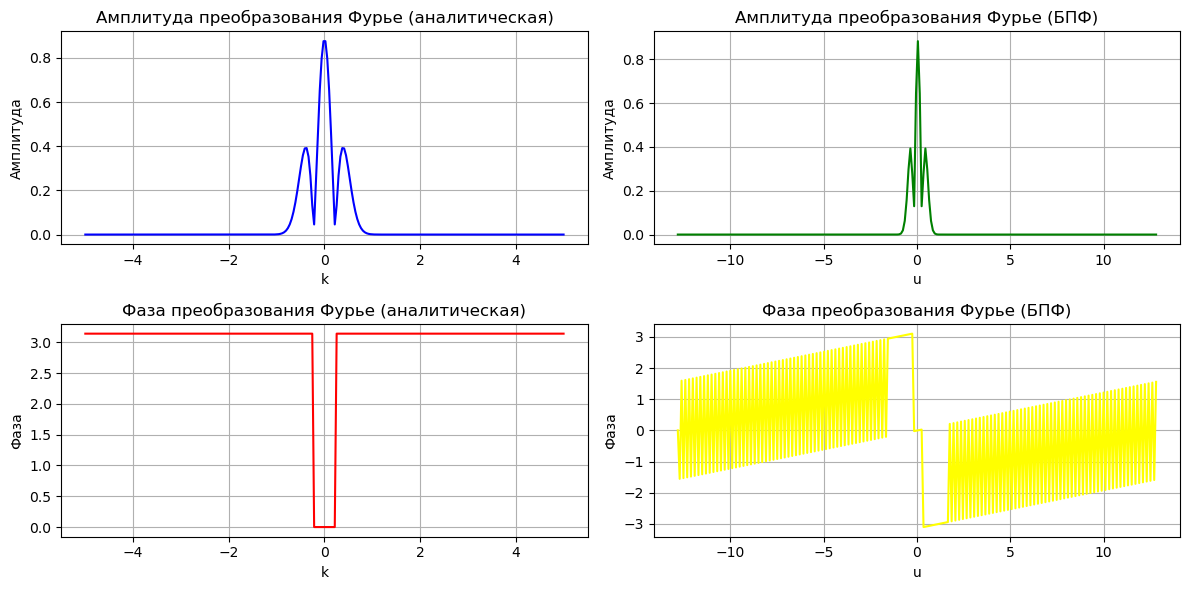

In [16]:
# Построение графиков
plt.figure(figsize=(12, 6))

# График амплитуды аналитической
plt.subplot(2, 2, 1)
plt.plot(k_vals, amplitude_analytic, color='blue')
plt.plot()
plt.title('Амплитуда преобразования Фурье (аналитическая)')
plt.xlabel('k')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(2, 2, 2)
# График амплитуды БПФ
plt.plot(u, amplitude, color='green')
plt.title('Амплитуда преобразования Фурье (БПФ)')
plt.xlabel("u")
plt.ylabel("Амплитуда")
plt.grid(True)

# График фазы
plt.subplot(2, 2, 3)
plt.plot(k_vals, phase_analytic, label='Фаза', color='r')
plt.title('Фаза преобразования Фурье (аналитическая)')
plt.xlabel('k')
plt.ylabel('Фаза')
plt.grid(True)

plt.subplot(2, 2, 4)
# График амплитуды БПФ
plt.plot(u, phase, color='yellow')
plt.title("Фаза преобразования Фурье (БПФ)")
plt.xlabel("u")
plt.ylabel("Фаза")
plt.grid(True)

plt.tight_layout()
plt.show()

Влияние N и M

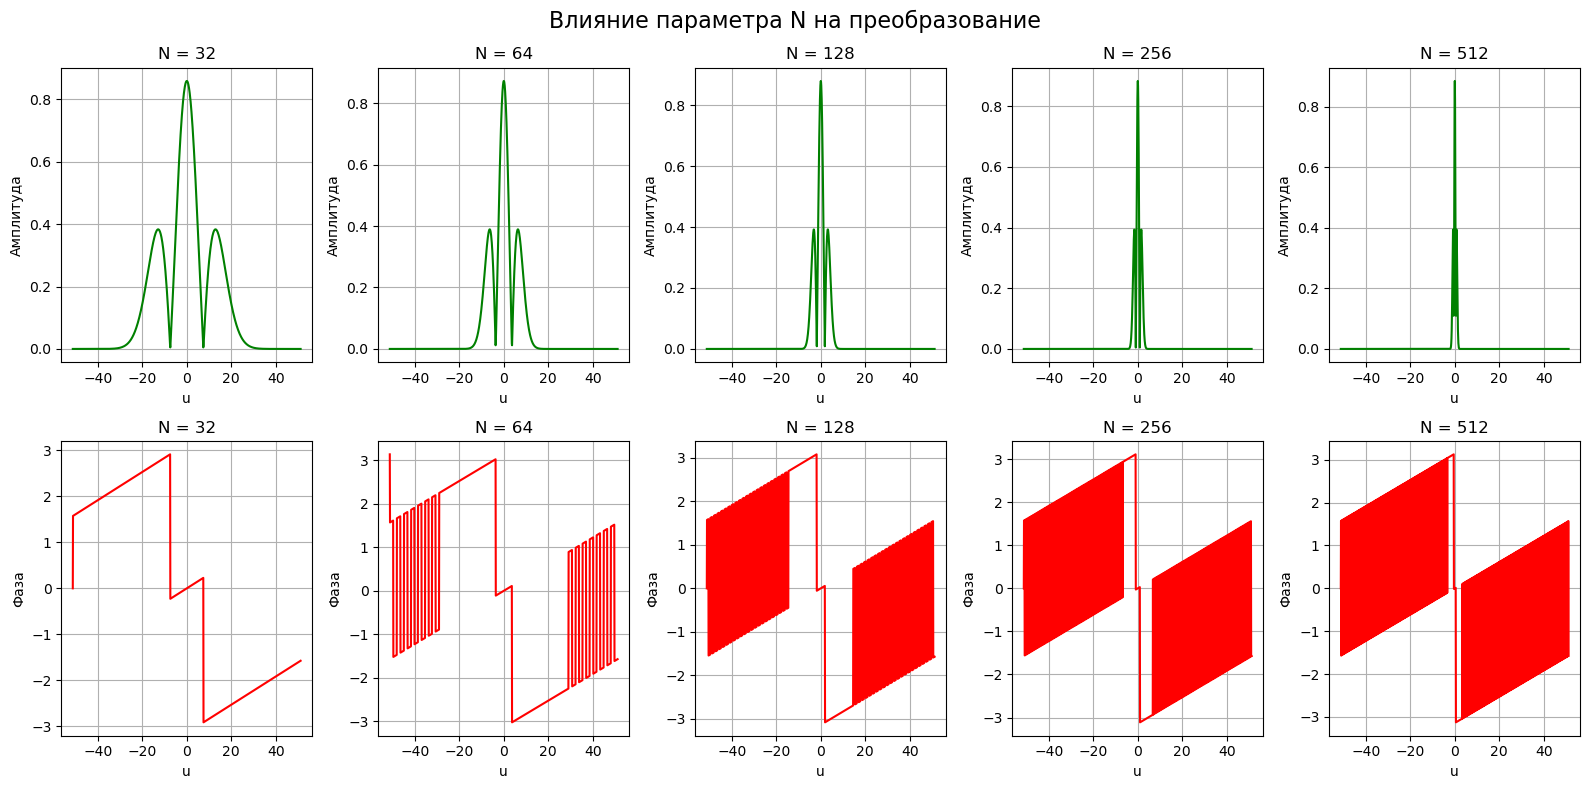

In [17]:
N_values = [32, 64, 128, 256, 512]
M_value = 1024
a = 5

fig, axes = plt.subplots(2, len(N_values), figsize=(16, 8))
fig.suptitle("Влияние параметра N на преобразование", fontsize=16)

for i, n in enumerate(N_values):
    x = np.linspace(-a, a, n)
    f_rect = f_field(x)
    u, F = finite_fft(f_rect, a, n, M_value)

    # Амплитуда
    axes[0, i].plot(u, np.abs(F), color='green')
    axes[0, i].set_title(f"N = {n}")
    axes[0, i].set_xlabel("u")
    axes[0, i].set_ylabel("Амплитуда")
    axes[0, i].grid()

    # Фаза
    axes[1, i].plot(u, np.angle(F), color='red')
    axes[1, i].set_title(f"N = {n}")
    axes[1, i].set_xlabel("u")
    axes[1, i].set_ylabel("Фаза")
    axes[1, i].grid()

plt.tight_layout()
plt.show()

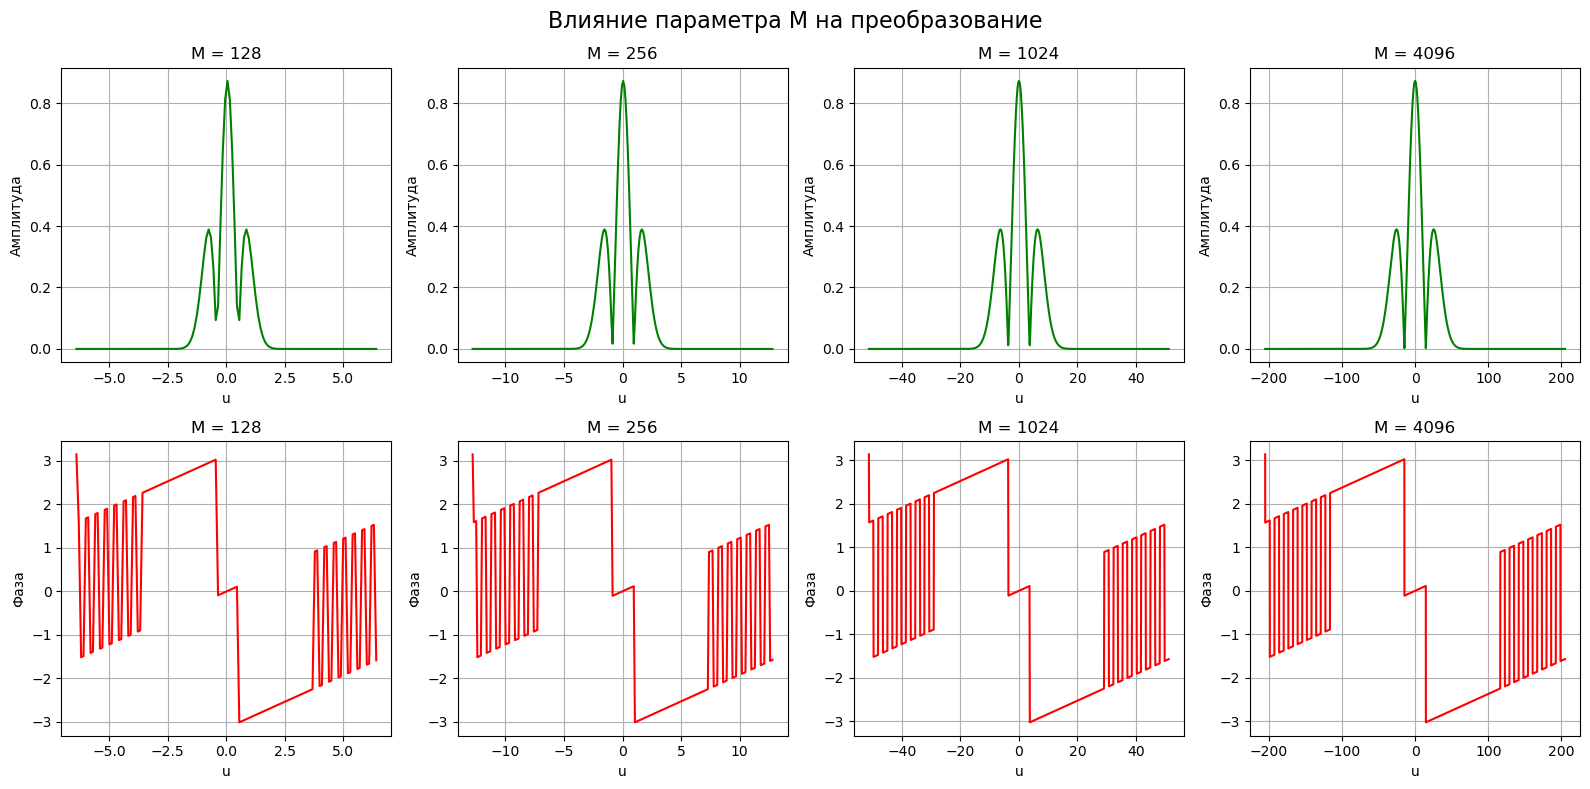

In [18]:
n = 6
N_value = 2**n
M_values = [2 ** i for i in np.linspace(n+1, 2*n, 4, dtype=int)]

fig, axes = plt.subplots(2, len(M_values), figsize=(16, 8))
fig.suptitle("Влияние параметра M на преобразование", fontsize=16)

for i, m in enumerate(M_values):
    x = np.linspace(-a, a, N_value)
    f_rect = f_field(x)
    u, F = finite_fft(f_rect, a, N_value, m)

    # Амплитуда
    axes[0, i].plot(u, np.abs(F), color='green')
    axes[0, i].set_title(f"M = {m}")
    axes[0, i].set_xlabel("u")
    axes[0, i].set_ylabel("Амплитуда")
    axes[0, i].grid()

    # Фаза
    axes[1, i].plot(u, np.angle(F), color='red')
    axes[1, i].set_title(f"M = {m}")
    axes[1, i].set_xlabel("u")
    axes[1, i].set_ylabel("Фаза")
    axes[1, i].grid()

plt.tight_layout()
plt.show()

In [19]:
def finite_fft_2d(f, a, N, M=None):
    """
    Реализация двумерного финитного преобразования Фурье.
    """
    if M is None:
        M = 2**int(np.ceil(np.log2(N)))

    # Шаг дискретизации
    hx = (2 * a) / N

    # Дополнение матрицы до размера M x M
    f_padded = np.pad(f, ((M - N) // 2, (M - N) // 2), 'constant')

    # Перестановка половин матрицы
    f_shifted = np.fft.fftshift(f_padded)

    # Применение двумерного БПФ
    F = np.fft.fft2(f_shifted)

    # Корректировка результата
    F = F * hx**2
    F = np.fft.fftshift(F)

    # Вычисление диапазонов
    hu = 1 / (M * hx)
    b = M / (4 * a)
    u = np.linspace(-b, b, M)
    v = np.linspace(-b, b, M)

    return u, v, F

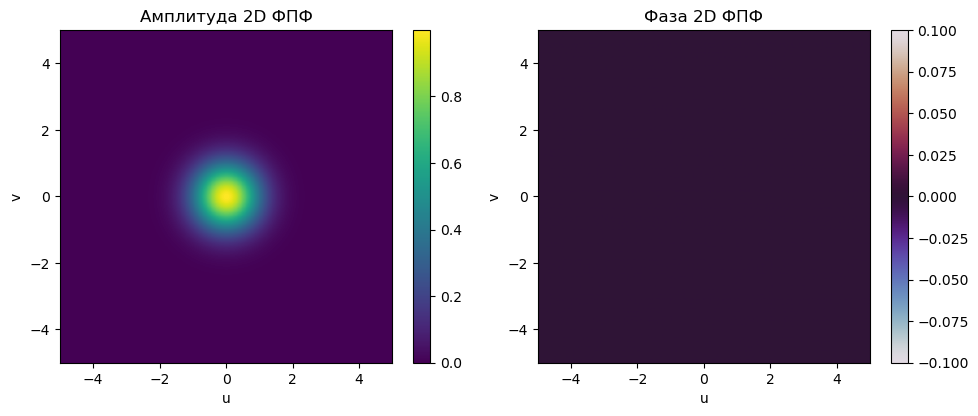

In [20]:
# Создание двумерной функции
x = np.linspace(-a, a, N)
y = np.linspace(-a, a, N)
X, Y = np.meshgrid(x, y)
f_2d = np.exp(-(X**2 + Y**2))  # Гауссов пучок

# Построение амплитуды
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(f_2d), extent=(-a, a, -a, a), origin='lower', cmap='viridis')
plt.colorbar()
plt.title("Амплитуда 2D ФПФ")
plt.xlabel("u")
plt.ylabel("v")

# Построение фазы
plt.subplot(1, 2, 2)
plt.imshow(np.angle(f_2d), extent=(-a, a, -a, a), origin='lower', cmap='twilight')
plt.colorbar()
plt.title("Фаза 2D ФПФ")
plt.xlabel("u")
plt.ylabel("v")

plt.tight_layout()
plt.show()

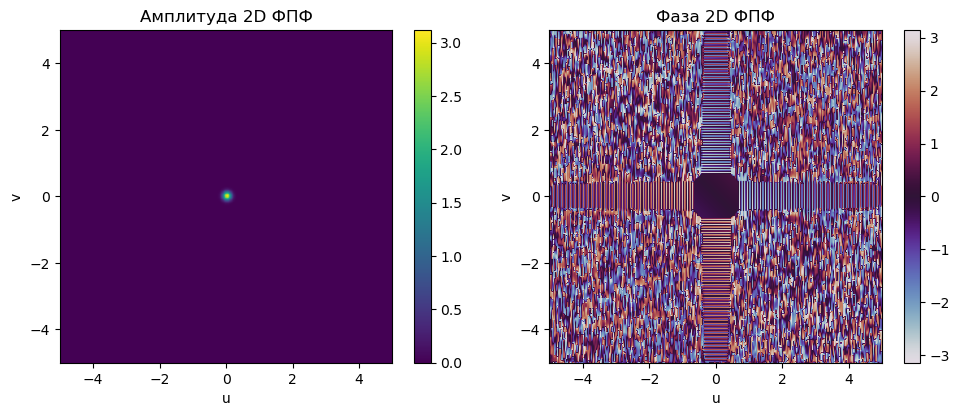

In [21]:
x = np.linspace(-a, a, N)
y = np.linspace(-a, a, N)
X, Y = np.meshgrid(x, y)
f_2d = np.exp(-(X**2 + Y**2))  # Гауссов пучок

# Преобразование
u, v, F_2d = finite_fft_2d(f_2d, a, N)

# Построение амплитуды
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(F_2d), extent=(-a, a, -a, a), origin='lower', cmap='viridis')
plt.colorbar()
plt.title("Амплитуда 2D ФПФ")
plt.xlabel("u")
plt.ylabel("v")

# Построение фазы
plt.subplot(1, 2, 2)
plt.imshow(np.angle(F_2d), extent=(-a, a, -a, a), origin='lower', cmap='twilight')
plt.colorbar()
plt.title("Фаза 2D ФПФ")
plt.xlabel("u")
plt.ylabel("v")

plt.tight_layout()
plt.show()

In [22]:
# Создание двумерного импульса
x = np.linspace(-a, a, N)
y = np.linspace(-a, a, N)

f_field_2D = np.zeros((N, N),complex)
for i in range(N):
    for j in range(N):
        f_field_2D[i, j] = f_field(x[i]) * f_field(y[j])

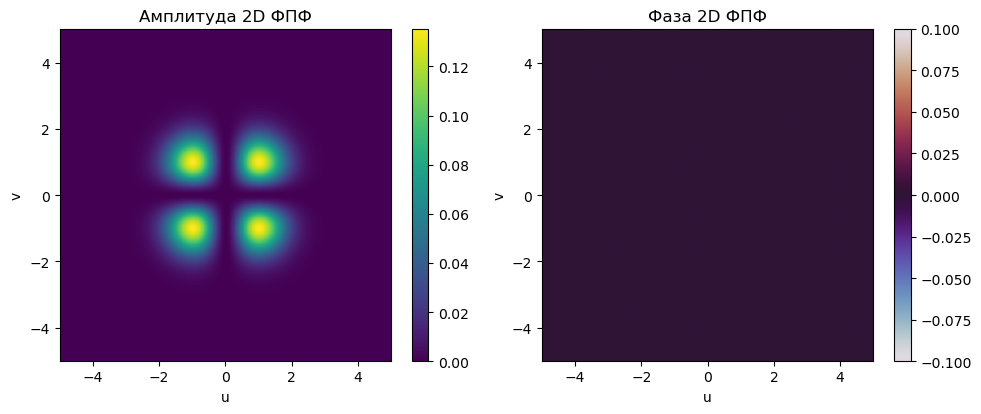

In [23]:
# Построение амплитуды
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(f_field_2D), extent=(-a, a, -a, a), origin='lower', cmap='viridis')
plt.colorbar()
plt.title("Амплитуда 2D ФПФ")
plt.xlabel("u")
plt.ylabel("v")

# Построение фазы
plt.subplot(1, 2, 2)
plt.imshow(np.angle(f_field_2D), extent=(-a, a, -a, a), origin='lower', cmap='twilight')
plt.colorbar()
plt.title("Фаза 2D ФПФ")
plt.xlabel("u")
plt.ylabel("v")

plt.tight_layout()
plt.show()

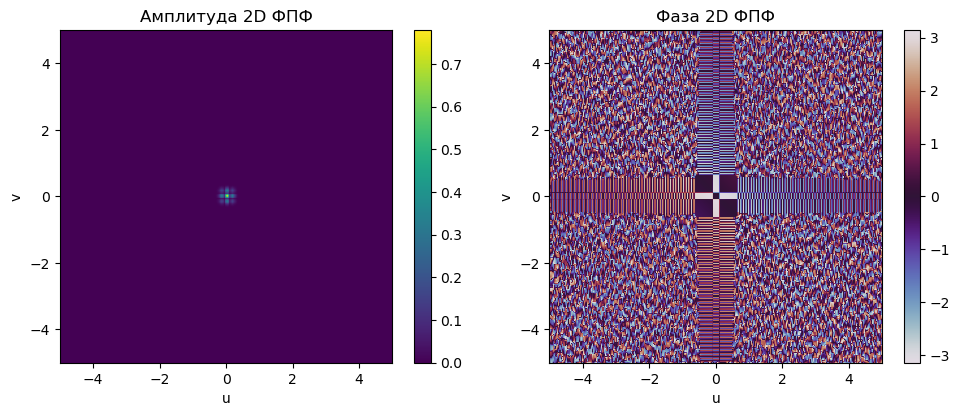

In [24]:
x = np.linspace(-a, a, N)
y = np.linspace(-a, a, N)
X, Y = np.meshgrid(x, y)
f_2d = np.exp(-(X**2 + Y**2))  # Гауссов пучок

# Преобразование
u, v, F_field_2d = finite_fft_2d(f_field_2D, a, N)

# Построение амплитуды
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(F_field_2d), extent=(-a, a, -a, a), origin='lower', cmap='viridis')
plt.colorbar()
plt.title("Амплитуда 2D ФПФ")
plt.xlabel("u")
plt.ylabel("v")

# Построение фазы
plt.subplot(1, 2, 2)
plt.imshow(np.angle(F_field_2d), extent=(-a, a, -a, a), origin='lower', cmap='twilight')
plt.colorbar()
plt.title("Фаза 2D ФПФ")
plt.xlabel("u")
plt.ylabel("v")

plt.tight_layout()
plt.show()